## 1 
Beebok is designing a new type of Crossfit shoe, the Nano LXII.  The fixed cost for the production will be $50,000.  The variable cost will be $18 per pair of shoes.  The shoes will sell for $130 for each pair.  Graph the cost and revenue functions – either by hand or with Python -- and determine how many pairs of sneakers will have to be sold for the company to break even on this new line of shoes. 

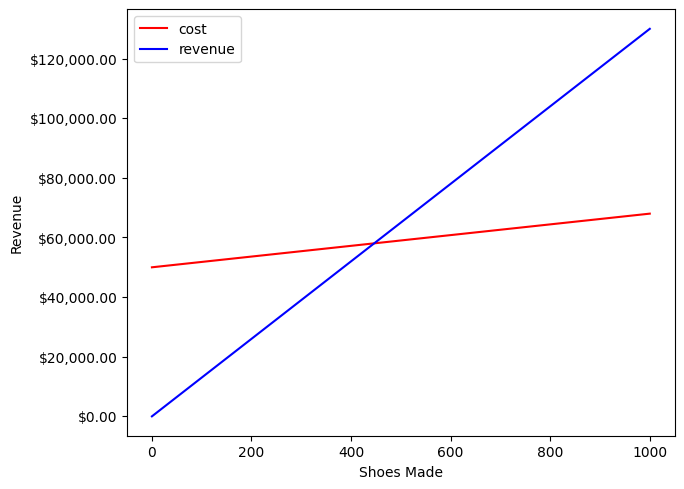

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
#graph
x = np.linspace(0,1000,100)
f1 = 50000 + x*18
f2 = x*130

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

plt.plot(x,f1, label = 'cost', color = 'red')
plt.plot(x,f2, label = 'revenue', color = 'blue')
plt.tight_layout()
plt.legend()
plt.xlabel('Shoes Made')
plt.ylabel('Revenue')

y_labels = ax.get_yticks()
ax.yaxis.set_major_formatter('${x:,.2f}')


plt.savefig('midterm1.png',bbox_inches = "tight")
plt.show()

#solution


In [4]:
import sympy as sym
import math
sym.init_printing()

x,y = sym.symbols('x,y')

solns = sym.solve([
    18*x -y + 50000,   # weight
    130*x - y],  # count
    [x, y])

print(solns)

print("Total number of shoes needed to breakeven (rev > costs) = ",int(3125/7)+(3125 % 7 > 0))


{x: 3125/7, y: 406250/7}
Total number of shoes needed to breakeven (rev > costs) =  447


## 2 
Elon invests a total of $17,500,000 in three products. He invests one part in a mutual fund which has an annual return of 11%. He invests the second part in government bonds at 7% per year. The third part he puts in CDs at 5% per year. He invests twice as much in the mutual fund as in the CDs. In the first year Elon’s investments bring a total return of $1,495,000. How much did he invest in each product?

In [16]:
import numpy as np

A = np.array([[1,1,1],[.11,.07,.05],[1,0,-2]])

B = [17500000,1495000,0]

X = np.linalg.solve(A,B)

print(X)
print("Mutual Fund Investment",round(X[0]))
print("Gov Bonds Investment",round(X[1]))
print("CDs Investment",round(X[2]))

[9000000. 4000000. 4500000.]
Mutual Fund Investment 9000000
Gov Bonds Investment 4000000
CDs Investment 4500000


## 3 
Vandelay Industries has 275 sales reps in order to sell its latex products, each to be assigned to one of four marketing teams. If the first team is to have four times as many members as the second team and the third team is to have five times as many members as the fourth team, how can the members be distributed among the teams?

In [4]:
#one way is just counting from 0
team1=0
team2=0
team3=0
team4=0
counter=[]

while total < 275:
    team2 += 1
    team4 += 1
    team1 = team2 * 4
    team3 = team4 * 5
    total=team1+team2+team3+team4
    holder=[team1,team2,team3,team4,total]
    counter.append(holder)

print(counter[-1])



[100, 25, 125, 25, 275]


In [66]:
import pandas as pd
#another way that works is if not counting incrementally,
#you just need all the solutions to 4a + b + 5c + d = 275
#not sure exactly how to do this
#but each of these would be between 1,275 inclusive
#reduced based on team1=team*4 and team3=team4*5
team1nums=[]
team1nums.extend(range(1,47))
team2nums=[]
team2nums.extend(range(1,47))
team3nums=[]
team3nums.extend(range(1,47))
team4nums=[]
team4nums.extend(range(1,47))
solutions=[]
#then we'll need something like this
for team1num in team1nums:
    for team2num in team2nums:
        for team3num in team3nums:
            for team4num in team4nums:
                if team1num*4 + team2num + team3num*5 +team4num == 275 and (team1num*4)%team2num == 0 and (team1num*5)%team2num == 0:
                    total = team1num*4 + team2num + team3num*5 +team4num
                    solutions.append([team1num*4,team2num,team3num*5,team4num,total])

solutionsdf=pd.DataFrame(solutions,columns=['Team1','Team2','Team3','Team4','Total'])
print('total sols = ',len(solutions))

#76	19	150	30	= 275

total sols =  1626


## 4 
Willie W’s Candy makes three types of artisanal, single-batch, organic, vegan, gluten free, cruelty-free, fun-free, fair trade chocolate truffles: cherry, almond, and raisin. Matrix A gives the amount of ingredients in one batch. Matrix B gives the costs of ingredients from suppliers J and K. Calculate the cost of 100 batches of each candy using ingredients from supplier K.

|sugar|choc|milk
|-|-|-|
|6| 8| 1|
|6| 4| 1|
|5| 7| 1|



4 3
4 5
2 2

In [30]:
import numpy as np
ingredients = [[6, 8, 1],[6, 4, 1],[5, 7, 1]]
A = np.matrix(ingredients)

prices  = [[4, 3],
           [4, 5],
           [2, 2]]

B = np.matrix(prices)

cost = A * B 

cherry100 = cost[0, 1]*100
almnond100 = cost[1, 1]*100
raisin100 = cost[2, 1]*100

print("cost for 100x cherry, supplier k = ",'${:,.2f}'.format(cherry100)) 
print("cost for 100x cherry, supplier k = ",'${:,.2f}'.format(almnond100)) 
print("cost for 100x cherry, supplier k = ",'${:,.2f}'.format(raisin100)) 



[[58 60]
 [42 40]
 [50 52]]
cost for 100x cherry, supplier k =  $6,000.00
cost for 100x cherry, supplier k =  $4,000.00
cost for 100x cherry, supplier k =  $5,200.00


## 5 
After its new expansion funded by donations from graduates of the MSDS program, MSDS-Ryan Arena will seat 28,000 people. Courtside seats cost $48, first level seats cost $36, and upper deck seats cost $24. The total revenue for a sellout is $750,000. If half the courtside seats, half the upper deck seats, and all the first level seats are sold, then the total revenue is $400,000. How many of each type of seat are there? Round your answers as needed.

In [35]:
import numpy as np

A = np.array([[1,1,1],[48,36,24],[24,36,12]])

B = [28000,750000,400000]

X = np.linalg.solve(A,B)

print(X)
print("court level seats = ",round(X[0])-1)
print("first level seats = ",round(X[1])+1)
print("upper level seats = ",round(X[2])-1)
#weird rounding occurs? 
#actual rounding gives us 28,001 seats
#can do +1 to first level, then -1 to court/upper
#or -1 first level, then +1 to court/upper

[ 2555.55555556  1388.88888889 24055.55555556]
court level seats =  2555
first level seats =  1390
upper level seats =  24055


## 6
Due to new environmental restrictions, Hoch Industries must use a new process to reduce pollution. The old process emits 6 g of CO2 and 3 g of lead per liter of chemical made. The new process emits 2 g of CO2 and 4 g of lead per liter of chemical made. The company makes a profit of 25¢ per liter under the old process and 16¢ per liter under the new process. No more than 18,000 g of CO2 and no more than 12,000 g of lead can be emitted daily. How many liters of chemicals should be made daily under each process to maximize profits?  What is the maximum profit?

In [39]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize
#LpMaximize your conversions
prob = LpProblem("problem", LpMaximize)

x = LpVariable("x", lowBound=0, cat='Integer')
y = LpVariable("y", lowBound=0, cat='Integer') 


prob += .25*x + .16*y 

prob += 6*x + 2*y <= 18000
prob += 3*x + 4*y <= 12000

status = prob.solve()
 
print("Pulp Status =", LpStatus[status])

print('Old =' , value(x))
print('New =' , value(y))
print('Profit = ', .25*value(x)+.16*value(y))


Pulp Status = Optimal
Old = 2667.0
New = 999.0
Profit =  826.59


## 7  

Northwestern is looking to hire teachers and TAs to fill its staffing needs for its summer program at minimum cost. The average monthly salary of a teacher is $2400 and the average monthly salary of a TA is $1100. The program can accommodate up to 45 staff members, needs at least 30 to run properly, and must have teachers (they will NOT employee only TAs…as much as it makes purely economic sense). They must have at least 10 TAs and may have up to 3 TA’s for every 2 teachers. How many teachers and TAs the should the program hire to minimize costs. What is the minimum cost?

In [72]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize
#LpMaximize your conversions
prob = LpProblem("problem", LpMinimize)

#x = teacher, y = ta
x = LpVariable("x", lowBound=1, cat='Integer')
y = LpVariable("y", lowBound=10, cat='Integer') 


prob += 2400*x + 1100*y 

prob += x + y <= 45
prob += x + y >= 30
#3 ta for every 2 teacher
#upper limit means ratio of ta/teacher = 3/2
prob += y <= 1.5*x

status = prob.solve()
 
print("Pulp Status =", LpStatus[status])

print('Teachers =' , value(x))
print('TAs =' , value(y))
print('Minimum Cost = ', '${:,.2f}'.format((2400*value(x))+(1100*value(y))))


Pulp Status = Optimal
Teachers = 12.0
TAs = 18.0
Minimum Cost =  $48,600.00


## 8
To be at his best as an athlete and play until he is 60 years old, TB needs at least 10 units of nutrient A, 12 units of nutrient B, and 20 units of nutrient C per day. Pill #1 contains 4 units of A and 3 of B. Pill #2 contains 1 unit of A, 2 of B, and 4 of C. Pill #3 contains 10 units of A, 1 of B, and 5 of C. Pill #1 costs 6 cents, pill #2 costs 8 cents, and pill #3 costs 1 cent. How many of each pill must he take to minimize his cost, and what is that cost?

In [79]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize
#LpMaximize your conversions
prob = LpProblem("problem", LpMinimize)

x = LpVariable("x", lowBound=0, cat='Integer')
y = LpVariable("y", lowBound=0, cat='Integer') 
z = LpVariable("z", lowBound=0, cat='Integer') 


prob += .06*x + .08*y + .01*z 

prob += 4*x + 1*y + 10*z >= 10
prob += 3*x + 2*y + 1*z >= 12
prob += 0*x + 4*y + 5*z >= 20


status = prob.solve()
 
print("Pulp Status =", LpStatus[status])

print('Pill #1 =' , value(x))
print('Pill #2 =' , value(y))
print('Pill #3 =' , value(z))
print('Minimum Cost = ', '${:,.2f}'.format((.06*value(x))+(.08*value(y))+(.01*value(z))))


Pulp Status = Optimal
Pill #1 = 0.0
Pill #2 = 0.0
Pill #3 = 12.0
Minimum Cost =  $0.12


## 9
Better Buy stocks Blu-ray DVD players, speaker systems by Tonos, and Semi-smart TVs. They have limited storage space and can stock a maximum of 210 of these three machines. They know from past experience that they should stock twice as many DVD players as speaker systems and at least 30 TVs. If each DVD player sells for $200, each speaker system sells for $1000, and each TV sells for $300, how many of each should be stocked and sold for maximum revenues? What is the maximum revenue? Round as needed.

In [88]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize
#LpMaximize your conversions
prob = LpProblem("problem", LpMaximize)

#x = dvd, y = speaker, z = tv
x = LpVariable("x", lowBound=0, cat='Integer')
y = LpVariable("y", lowBound=0, cat='Integer') 
z = LpVariable("z", lowBound=30, cat='Integer') 


prob += 200*x + 1000*y + 300*z 

prob += x + y + z <= 210
#must stock dvd/speaker in at least 2/1
prob += x >= 2*y

status = prob.solve()
 
print("Pulp Status =", LpStatus[status])

print('DVD players to stock =' , value(x))
print('Speakers to stock =' , value(y))
print('TVs to stock =' , value(z))
print('Maximum Revenue = ', '${:,.2f}'.format((200*value(x))+(1000*value(y))+(300*value(z))))


Pulp Status = Optimal
DVD players to stock = 120.0
Speakers to stock = 60.0
TVs to stock = 30.0
Minimum Cost =  $93,000.00


## 10
McDowell’s, home of the Big Mick, is conducting a sweepstakes, and ships two boxes of game pieces to a particular franchise. Box A has 2% of its contents being winners, while 5% of the contents of box B are winners. Box A contains 25% of the total tickets. The contents of both boxes are mixed in a drawer and a ticket is chosen at random. Find the probability it came from box A if it is a winner.

In [99]:
boxa_winners = .02
boxa_tickets = .25
boxb_winners = .05
boxb_tickets = .75

prob_winner = (boxa_tickets * boxa_winners) + (boxb_tickets * boxb_winners)
not_winner = 1-prob_winner
print('prob of winning = ',prob_winner)
print('prob of not winning = ',not_winner)

prob_boxa_ticket_is_a_winner = boxa_winners * boxa_tickets
print('prob of box A ticket being a winner = ',prob_boxa_ticket_is_a_winner)

prob_winner_is_from_a = prob_boxa_ticket_is_a_winner / prob_winner
print('prob of box A ticket given the ticket drawn was a winner',prob_winner_is_from_a)




prob of winning =  0.0425
prob of not winning =  0.9575
prob of box A ticket being a winner =  0.005
prob of box A ticket given the ticket drawn was a winner 0.11764705882352941
